## Bluesky RunEngine setup

In [1]:


# Import bluesky and ophyd
import matplotlib.pyplot as plt
from bluesky import RunEngine
from bluesky.run_engine import get_bluesky_event_loop
from bluesky.callbacks.best_effort import BestEffortCallback
from bluesky.plan_stubs import *
from bluesky.plans import *

import asyncio


from bluesky.utils import ProgressBarManager
from secop_ophyd.SECoPDevices import SECoP_Node_Device



 

# Create a run engine, with plotting, progressbar and transform
RE = RunEngine({}, call_returns_result=True)
bec = BestEffortCallback()
RE.subscribe(bec)
RE.waiting_hook = ProgressBarManager()
RE.ignore_callback_exceptions = False
plt.ion()


### ophyd-SECoP Device generation

In [2]:
cryoNode = SECoP_Node_Device.create_external_loop(host='localhost',port ='10769',loop= RE.loop)

cryo_7.frappy.demo ready


### Count Plan



Transient Scan ID: 1     Time: 2023-06-13 17:20:27
Persistent Unique Scan ID: '9994c154-40cd-4f7a-a716-ef87fa56ebb5'
New stream: 'primary'
+-----------+------------+-------------------------------+
|   seq_num |       time | cryo_7-frappy-demo-cryo-value |
+-----------+------------+-------------------------------+
|         1 | 17:20:27.6 |                        10.047 |
|         2 | 17:20:28.1 |                        10.009 |
|         3 | 17:20:28.6 |                         9.999 |
|         4 | 17:20:29.1 |                        10.033 |
|         5 | 17:20:29.6 |                         9.978 |
|         6 | 17:20:30.1 |                        10.039 |
|         7 | 17:20:30.6 |                         9.955 |
|         8 | 17:20:31.1 |                        10.013 |
|         9 | 17:20:31.6 |                        10.006 |
|        10 | 17:20:32.1 |                         9.961 |
|        11 | 17:20:32.6 |                         9.985 |
|        12 | 17:20:33.1 |       

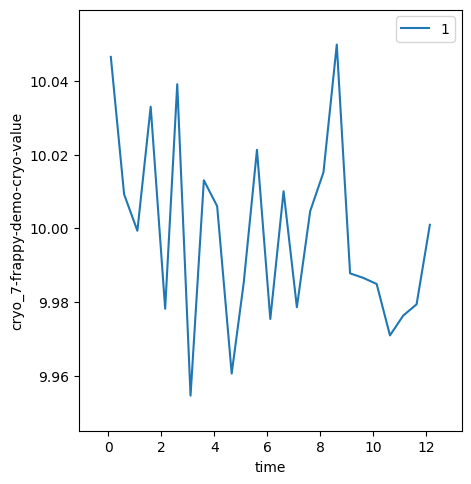

In [3]:
# get readings of cryo.value (0.5/s)
p = RE(count([cryoNode.cryo],num=25,delay=0.5))

### Scan Plan



Transient Scan ID: 2     Time: 2023-06-13 17:20:44
Persistent Unique Scan ID: 'ffc158a2-c9a3-4818-9d92-674c76f69ce8'
New stream: 'primary'
+-----------+------------+-------------------------------+
|   seq_num |       time | cryo_7-frappy-demo-cryo-value |
+-----------+------------+-------------------------------+
|         1 | 17:20:44.1 |                        10.023 |

                                                                               
|         2 | 17:21:13.5 |                        10.187 |

                                                                               
|         3 | 17:21:47.6 |                        10.452 |

                                                                               
|         4 | 17:22:17.7 |                        10.751 |

                                                                               
|         5 | 17:22:48.9 |                        10.952 |
+-----------+------------+-------------------------------+
gene

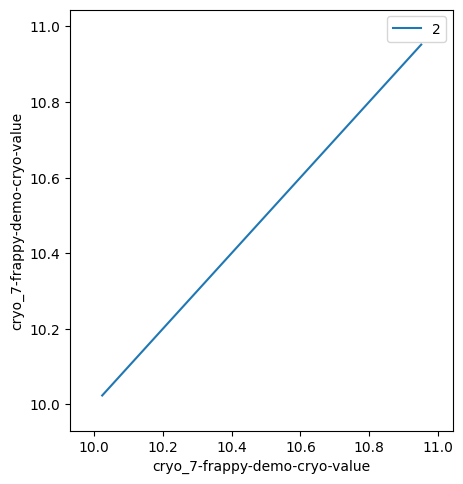

In [4]:
# drive from 10K to 11K in five steps 
p = RE(scan([cryoNode.cryo],cryoNode.cryo,10,11,5))

In [ ]:
cryoNode